<h2 align='center' style='color:blue'> Outlier Detection and Removal Using Interquartile Range(IQR)</h2>

Given a height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

What I need to do is:

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
df = pd.read_csv("height_weight.csv")
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**Histgram for weights**

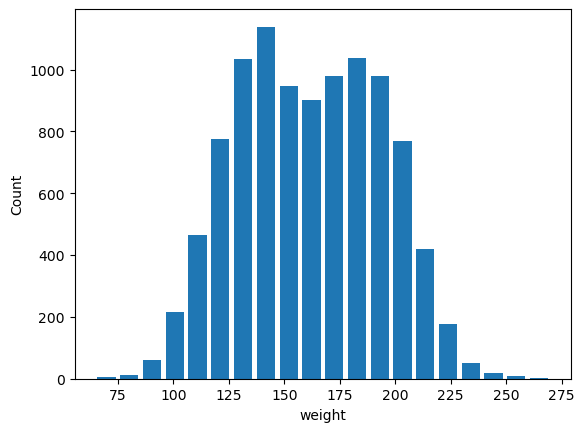

In [3]:
import matplotlib
from matplotlib import pyplot as plt

plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('weight')
plt.ylabel('Count')
plt.show()

**Histgram for heights**

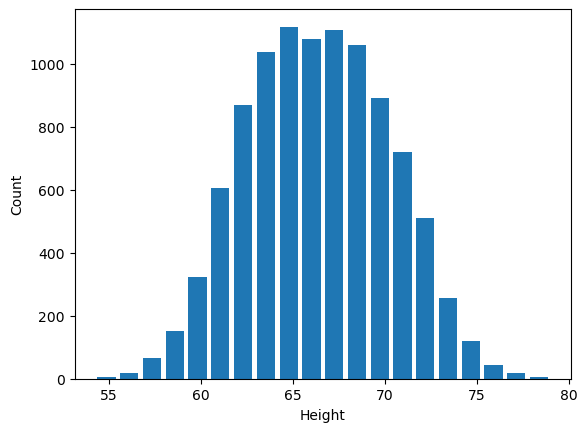

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

**Detect outliers based on weight, Q1, Q3, IQR**

In [5]:
Q1 = df['weight'].quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

### IQR

In [6]:
IQR = Q3 - Q1
IQR

51.35147356318197

### Upperlimit, lowerlimit

In [7]:
lower_limit_weight = Q1 - 1.5*IQR
upper_limit_weight = Q3 + 1.5*IQR
lower_limit_weight, upper_limit_weight

(58.79084096072856, 264.19673521345646)

### Finding the outlier records

In [8]:
df[df['weight']> upper_limit_weight]

,gender,height,weight
2014,Male,78.998742,269.989699


**Detecting outliers based on height Q1, Q3**

In [9]:
Q1 = df['height'].quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3


(63.505620481218955, 69.1742617268347)

### IQR

In [10]:
IQR = Q3-Q1
IQR

5.668641245615746

### Upperlimit, lowerlimit

In [11]:
lower_limit_height = Q1 - 1.5*IQR
upper_limit_height = Q3 + 1.5*IQR
lower_limit_height, upper_limit_height

(55.00265861279534, 77.67722359525831)

### Finding the outlier records

In [12]:
df[(df.height<lower_limit_height)|(df.height>upper_limit_height)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


**Remove Outliers to Create a Clean Dataset:**

In [13]:
clean_df = df[(df['weight'] <= upper_limit_weight) & 
              (df['height'] >= lower_limit_height) & 
              (df['height'] <= upper_limit_height)]


In [14]:
clean_df 

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


**Display and Save the Clean Dataset:**

In [17]:
print("Cleaned Dataset:")
print(clean_df.head())

clean_df.to_csv("cleaned_height_weight.csv", index=False)


Cleaned Dataset:
  gender     height      weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
